In [1]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)
alexnet = models.alexnet(pretrained=True)
vgg16 = models.vgg16(pretrained=True)
densenet = models.densenet161(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/hub/checkpoints/densenet161-8d451a50.pth


In [53]:
from PIL import Image
img = Image.open("data/Bell-Peppers.jpg")

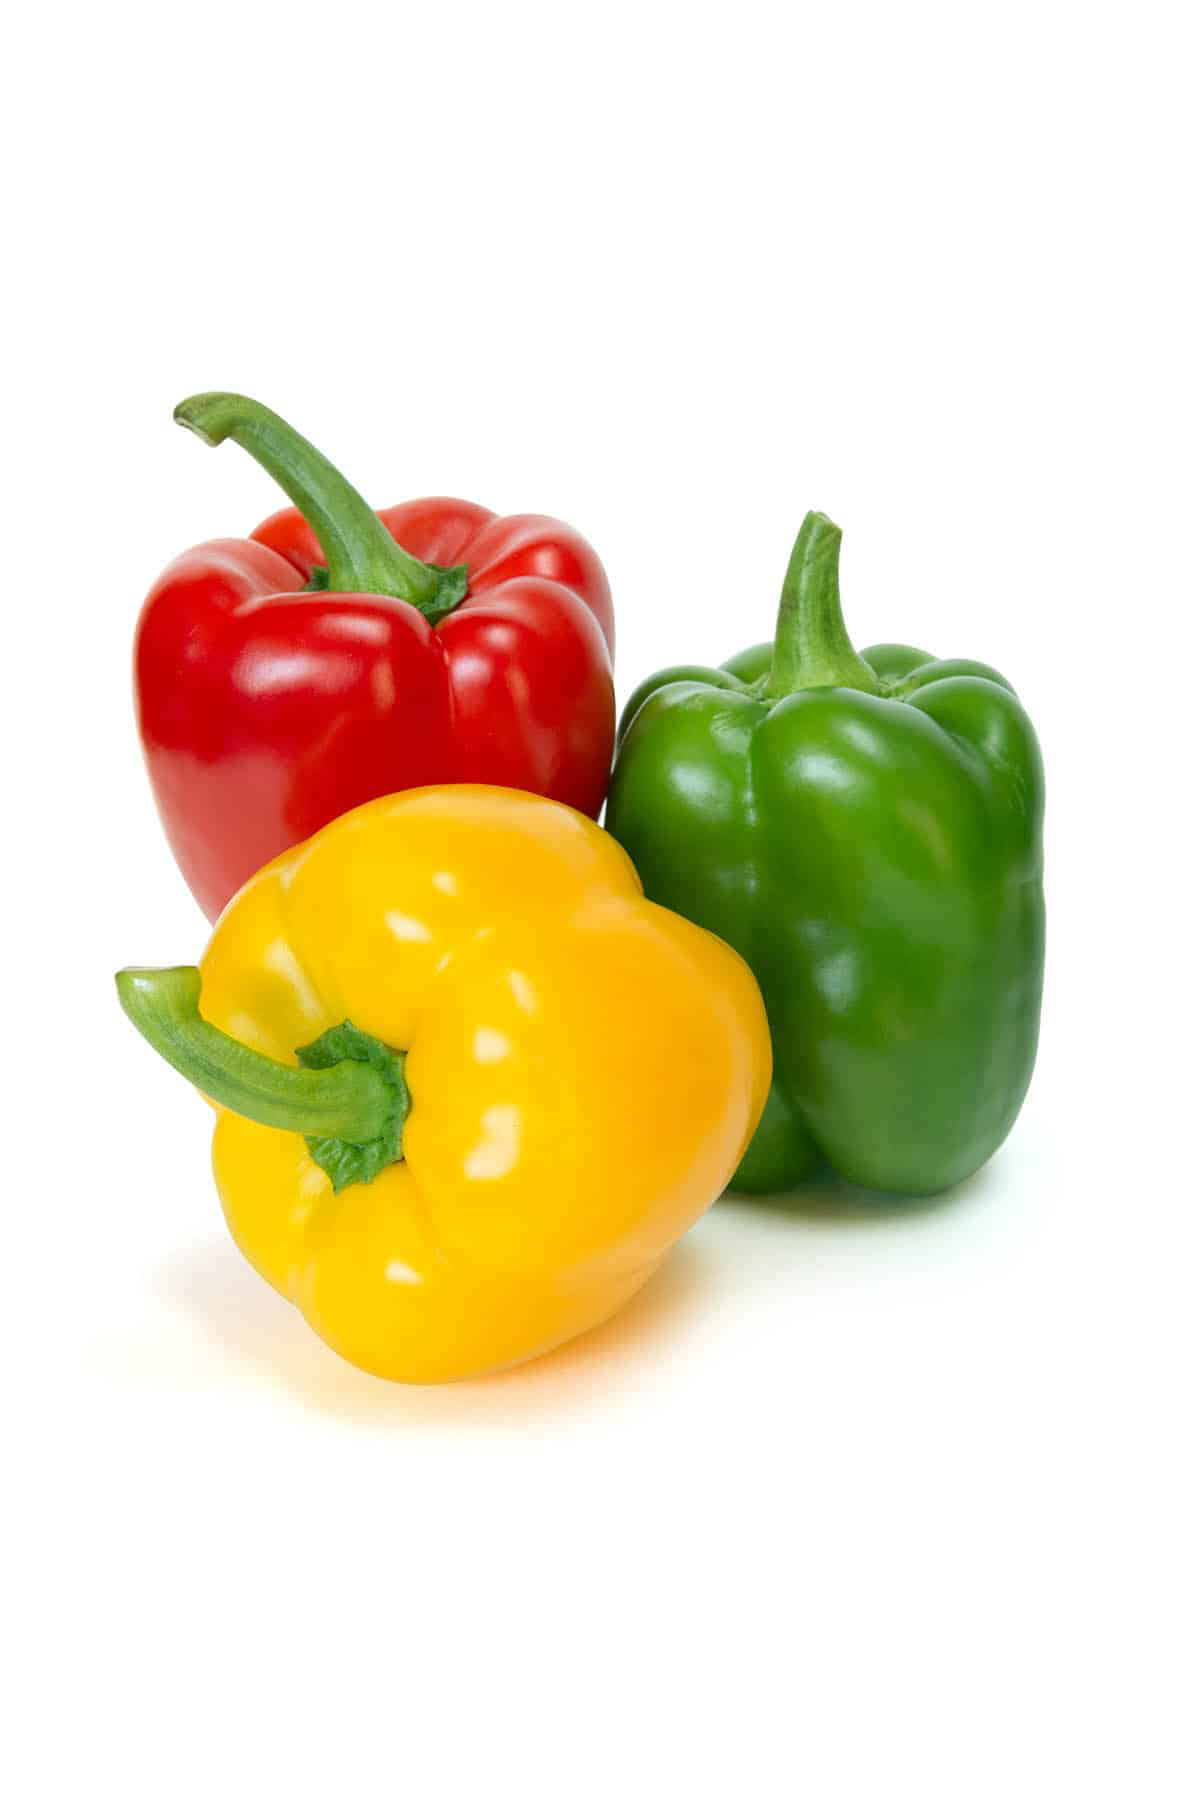

In [54]:
img

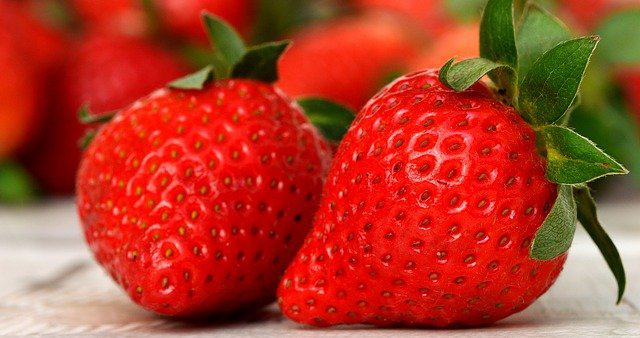

In [27]:
img2 = Image.open("data/strawberries.jpg")
img2

In [6]:
from torchvision import transforms
transform = transforms.Compose([            #[1]
 transforms.Resize(256),                    #[2]
 transforms.CenterCrop(224),                #[3]
 transforms.ToTensor(),                     #[4]
 transforms.Normalize(                      #[5]
 mean=[0.485, 0.456, 0.406],                #[6]
 std=[0.229, 0.224, 0.225]                  #[7]
 )])

In [55]:
import torch
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0)
img_t_2 = transform(img2)
batch_t_2 = torch.unsqueeze(img_t_2, 0)

In [40]:
alexnet.eval()
resnet18.eval()
vgg16.eval()
densenet.eval()

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(96, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(192, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(144, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [71]:
out1 = alexnet(batch_t_2)
out2 = resnet18(batch_t_2)
out3 = vgg16(batch_t_2)
out4 = densenet(batch_t_2)

In [61]:
with open('data/imagenet_classes.txt') as f:
  classes = [line.strip() for line in f.readlines()]

In [72]:
print("-----Alexnet------")
_, index = torch.max(out1, 1)
percentage = torch.nn.functional.softmax(out1, dim=1)[0] * 100
print(classes[953], percentage[953].item())
print("-----resnet18------")
_, index = torch.max(out2, 1)
percentage = torch.nn.functional.softmax(out2, dim=1)[0] * 100
print(classes[953], percentage[953].item())
print("-----vgg16------")
_, index = torch.max(out3, 1)
percentage = torch.nn.functional.softmax(out3, dim=1)[0] * 100
print(classes[953], percentage[953].item())
print("-----densenet------")
_, index = torch.max(out4, 1)
percentage = torch.nn.functional.softmax(out4, dim=1)[0] * 100
print(classes[953], percentage[953].item())

-----Alexnet------
949, strawberry 0.0003448165371082723
-----resnet18------
949, strawberry 0.001202316489070654
-----vgg16------
949, strawberry 0.004769515246152878
-----densenet------
949, strawberry 0.07039297372102737


모델을 제대로 짜지 않아서 네 모델 모두 정확도는 낮았지만 densenet이 제일 높은 편인것으로 나타났다.